<a href="https://colab.research.google.com/github/burntato/PCVK_Genap_2023/blob/master/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob as glob

Gamma Correction pada citra
--------------------------
Masukkan nilai Gamma: 3


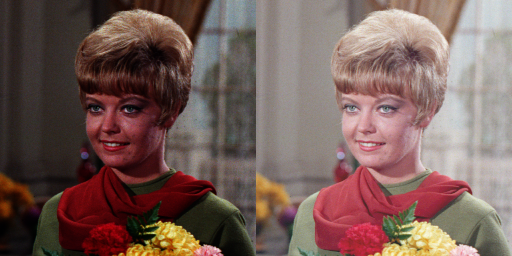

In [36]:
img = cv.imread('/content/drive/MyDrive/img/female.tiff')

print('Gamma Correction pada citra')
print('--------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    exit()

gamma_correction = np.clip(255 * np.power(img / 255, 1/gamma), 0, 255).astype(np.uint8)

hasil = np.concatenate((img, gamma_correction), axis = 1)

cv2_imshow(hasil)

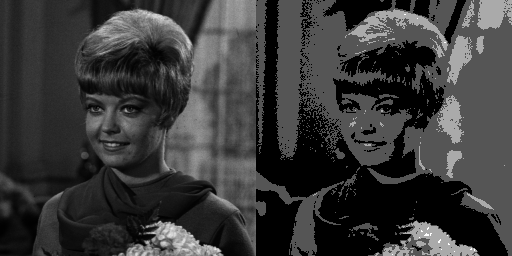

In [37]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/img/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype) 

depth_image = ((np.round(original / level)).astype(int) * level).astype(np.uint8)

output = np.concatenate((original, depth_image), axis=1)
cv2_imshow(output)

In [120]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/img/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n) 


In [121]:
len(cv_img)

100

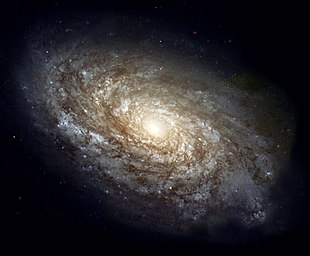

PSNR :  361.20199909921956


In [122]:
cv_original = cv.imread('/content/drive/MyDrive/img/galaxy.jpg')
cv2_imshow(cv_original)
original_psnr = cv.PSNR(cv_original, cv_original)
print("PSNR : ", original_psnr)

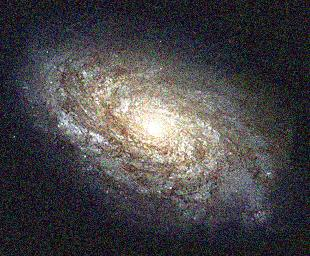

Average PSNR dibandingkan dengan cv_img[5]: 88.42 dB
Average MSE dibandingkan dengan cv_img[5]: 74.66



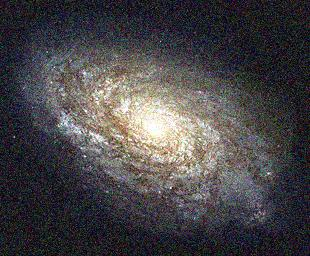

Average PSNR dibandingkan dengan cv_img[30]: 88.41 dB
Average MSE dibandingkan dengan cv_img[30]: 74.66



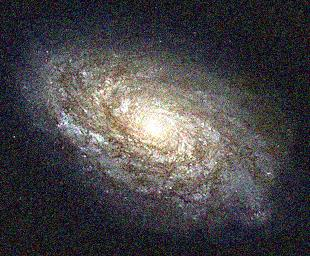

Average PSNR dibandingkan dengan cv_img[60]: 88.42 dB
Average MSE dibandingkan dengan cv_img[60]: 74.67



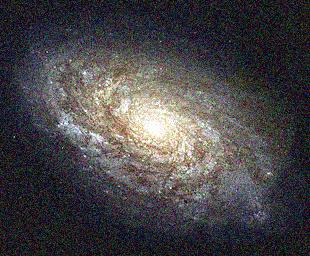

Average PSNR dibandingkan dengan cv_img[80]: 88.42 dB
Average MSE dibandingkan dengan cv_img[80]: 74.64



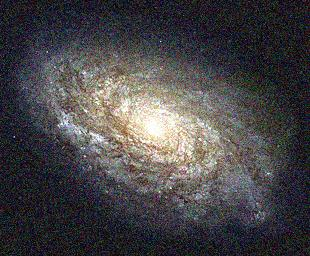

Average PSNR dibandingkan dengan cv_img[100]: 88.40 dB
Average MSE dibandingkan dengan cv_img[100]: 74.60



In [126]:
psnrs = []
mses = []
for i in [4, 29, 59, 79, 99]:
  psnrs_i = []
  mses_i = []
  for j in [4, 29, 59, 79, 99]:
    # PSNR
    psnr = cv.PSNR(cv_img[i], cv_img[j])
    psnrs_i.append(psnr)

    # MSE
    mse = np.mean((cv_img[i] - cv_img[j]) ** 2)
    mses_i.append(mse)

  # Average PSNR dan MSE
  avg_psnr_i = sum(psnrs_i) / len(psnrs_i)
  avg_mse_i = sum(mses_i) / len(mses_i)

  psnrs.append(avg_psnr_i)
  mses.append(avg_mse_i)


# Print results
for i in range(len(psnrs)):
  img_index = [4, 29, 59, 79, 99][i]

  cv2_imshow(cv_img[img_index])
  print(f"Average PSNR dibandingkan dengan cv_img[{[5, 30, 60, 80, 100][i]}]: {psnrs[i]:.2f} dB")
  print(f"Average MSE dibandingkan dengan cv_img[{[5, 30, 60, 80, 100][i]}]: {mses[i]:.2f}\n")

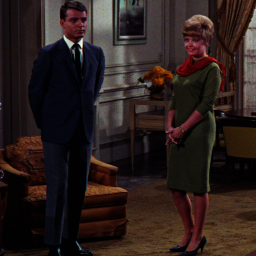

In [87]:
img_couple = cv.imread('/content/drive/MyDrive/img/couple.tiff')
cv2_imshow(img_couple)

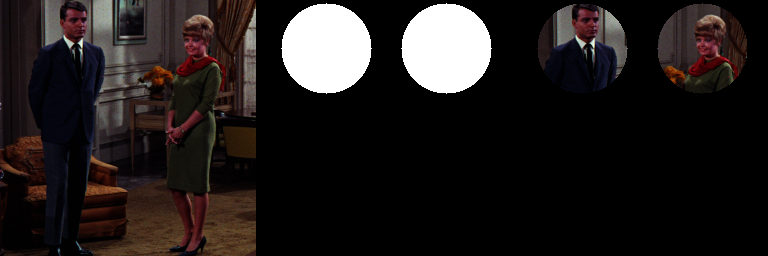

In [115]:
mask = np.zeros_like(img_couple)

# Draw the two circles on the mask image
cv.circle(mask, (70, 48), 45, (255, 255, 255), -1)
cv.circle(mask, (190, 48), 45, (255, 255, 255), -1)

# Apply the mask to the original image
masked_img = cv.bitwise_and(img_couple, mask)

# Combine the images horizontally
output = np.concatenate((img_couple, mask, masked_img), axis=1)

# Display the output image
cv2_imshow(output)

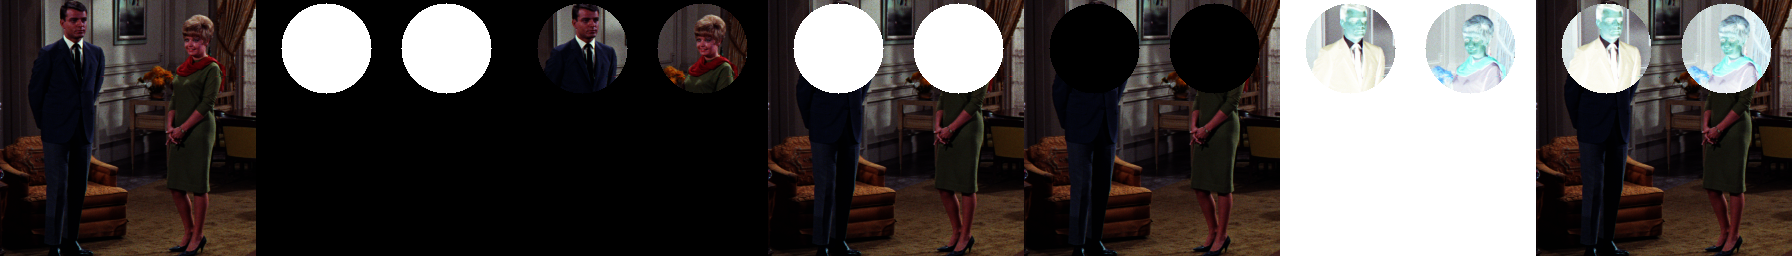

In [128]:
# OR
masked_or = cv.bitwise_or(img_couple, mask)

# NOT
masked_not = cv.bitwise_not(mask)
masked_not_result = cv.bitwise_and(img_couple, masked_not)

# NAND
masked_nand = cv.bitwise_not(cv.bitwise_and(img_couple, mask))

# XOR
masked_xor = cv.bitwise_xor(img_couple, mask)

# OUTPUT
output = np.hstack((img_couple, mask, masked_img, masked_or, masked_not_result, masked_nand, masked_xor))
cv2_imshow(output)